In [78]:
#QUESTION 1
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
penguins = sns.load_dataset("penguins")
df=pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')

In [79]:
species_stats = penguins.groupby('species')['flipper_length_mm'].agg(
    mean='mean', 
    median='median', 
    min='min', 
    max='max', 
    q1=lambda x: x.quantile(0.2), 
    q3=lambda x: x.quantile(0.2),
    std='std'
).reset_index()

species_stats['lower_2std'] = species_stats['mean'] - 2 * species_stats['std']
species_stats['upper_2std'] = species_stats['mean'] + 2 * species_stats['std']

In [80]:
fig = go.Figure()
for species in species_stats['species']:
 
    species_data = penguins[penguins['species'] == species]
    
   
    fig.add_trace(go.Histogram(
        x=species_data['flipper_length_mm'],
        name=species, 
        opacity=1
    ))

In [81]:
for _, row in species_stats.iterrows():
    species_name = row['species']
    
    # Mean and Median lines
    fig.add_vline(x=row['mean'], line=dict(color='black', width=0.2, dash='dash'), 
                  annotation_text=f'{species_name} Mean', annotation_position="top left")
    
    fig.add_vline(x=row['median'], line=dict(color='green', width=0.2, dash='dot'), 
                  annotation_text=f'{species_name} Median', annotation_position="top right")
    
    # Range (Min-Max)
    fig.add_vrect(x0=row['min'], x1=row['max'], fillcolor="lightgrey", opacity=0.1, 
                  annotation_text=f'{species_name} Range', annotation_position="top left")
    
    # Interquartile Range (Q1-Q3)
    fig.add_vrect(x0=row['q1'], x1=row['q3'], fillcolor="orange", opacity=0.1, 
                  annotation_text=f'{species_name} IQR', annotation_position="bottom left")
    
    # 2 Standard Deviation Range (Mean ± 2*STD)
    fig.add_vrect(x0=row['lower_2std'], x1=row['upper_2std'], fillcolor="red", opacity=0.1, 
                  annotation_text=f'{species_name} ±2 STD', annotation_position="bottom right")
 

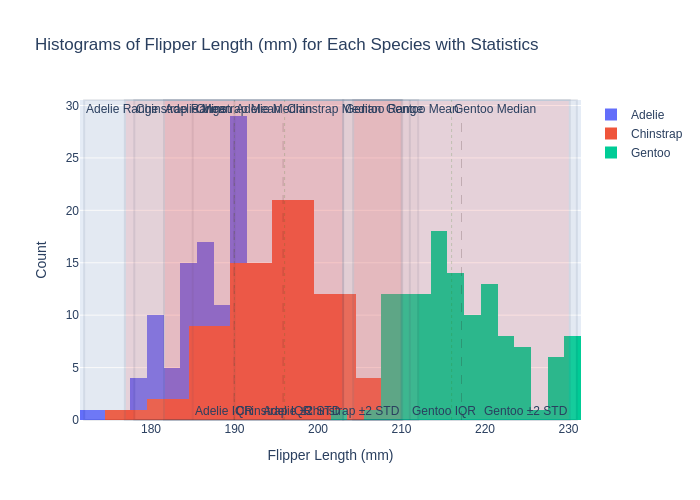

In [82]:
fig.update_layout(
    title='Histograms of Flipper Length (mm) for Each Species with Statistics',
    xaxis_title='Flipper Length (mm)',
    yaxis_title='Count',
    barmode='overlay'
)

# Show the plot
fig.show(renderer="png")

In [83]:
#chat gpt https://chatgpt.com/share/66f5d0b1-2838-800e-b596-07f9a6be77e4 (for q1)

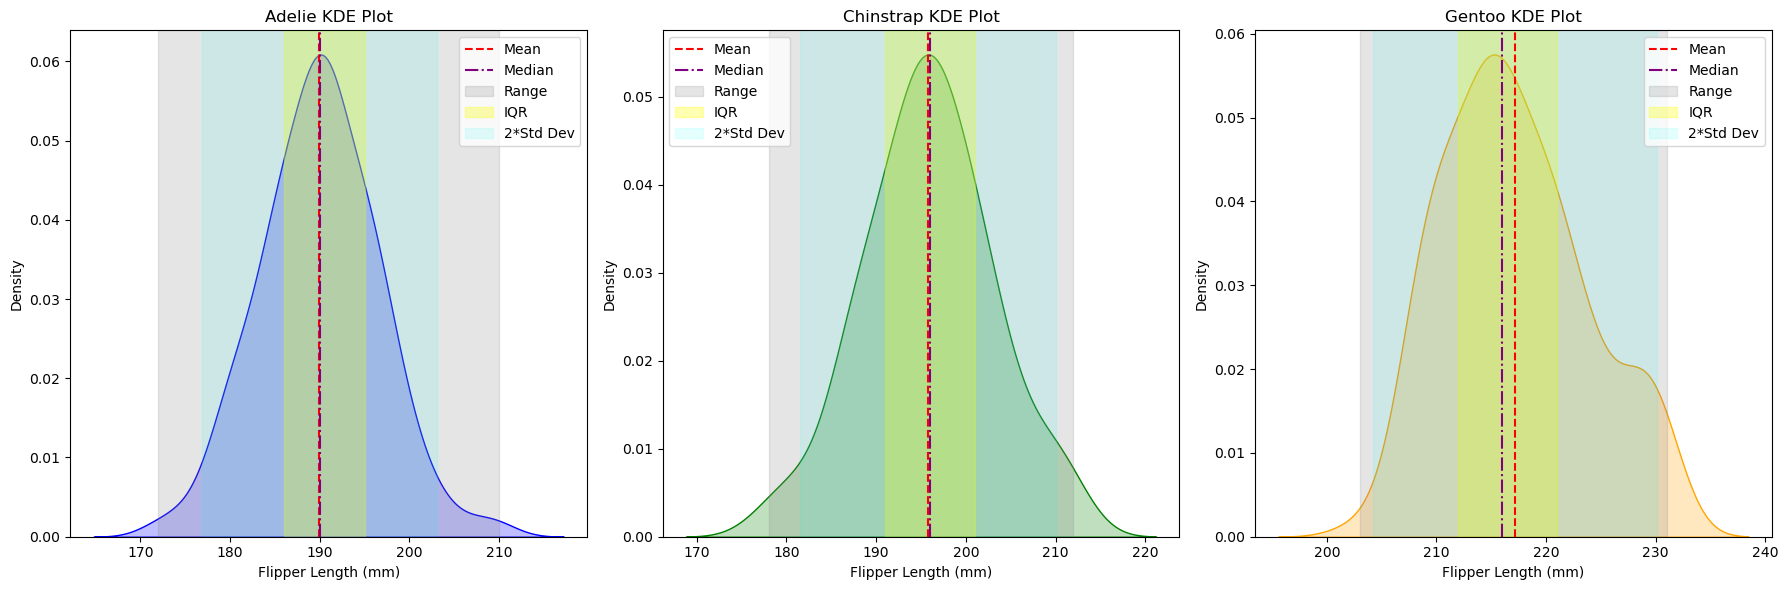

In [84]:
#QUESTION 2
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df=pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')
# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Drop rows with missing values for flipper_length_mm
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Group the data by species
grouped = penguins.groupby('species')

# Set up the plot figure, with 1 row and 3 columns (one plot per species)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define colors for the species
colors = ['blue', 'green', 'orange']

# Iterate over each species and plot the KDE with mean, median, range, IQR, and 2*std
for i, (species, group) in enumerate(grouped):
    ax = axes[i]
    sns.kdeplot(group['flipper_length_mm'], ax=ax, color=colors[i], fill=True)
    
    # Calculate statistics
    mean = group['flipper_length_mm'].mean()
    median = group['flipper_length_mm'].median()
    min_val = group['flipper_length_mm'].min()
    max_val = group['flipper_length_mm'].max()
    q1 = group['flipper_length_mm'].quantile(0.25)
    q3 = group['flipper_length_mm'].quantile(0.75)
    std_dev = group['flipper_length_mm'].std()
    
    # Plot mean and median as vertical lines
    ax.axvline(mean, color='red', linestyle='--', label='Mean')
    ax.axvline(median, color='purple', linestyle='-.', label='Median')
    
    # Plot range (min to max) as a shaded area
    ax.axvspan(min_val, max_val, alpha=0.2, color='grey', label='Range')
    
    # Plot IQR as a shaded area
    ax.axvspan(q1, q3, alpha=0.3, color='yellow', label='IQR')
    
    # Plot 2 standard deviations from the mean as a shaded area
    ax.axvspan(mean - 2 * std_dev, mean + 2 * std_dev, alpha=0.1, color='cyan', label='2*Std Dev')
    
    # Set title and labels
    ax.set_title(f'{species} KDE Plot')
    ax.set_xlabel('Flipper Length (mm)')
    ax.legend()

# Show the plot
plt.tight_layout()
fig.show(renderer="png")


In [85]:
#chat gpt https://chatgpt.com/share/66f5e695-d48c-800e-be49-348806e790bb (for q2)

In [86]:
#QUESTION 3 
#KDE provides smooth estimates of the data probability density function without relying on bins such as histograms.
#Boxplot use five numbers to summarize the data distribution: minimum, first quartile, median, third quartile, and maximum, plus possible outliers.
#Histogram is a bar chart showing the frequency with which data points fall within a specific "year" interval.

#I prefer histhgram, it provides clear summaries even with large amounts of data and easy to create and understand, providing an intuitive way to
#visualize the distribution of data within an interval and the bin size can be adjusted to explore different levels of data granularity. 
#To compare with two other method, it with frequency focus, and is simple, intuitive and flexiable.


In [87]:
#chat gpt (It said it is not avaliable to share the chatlog with photo, so this link is copy directly from the chatgpt(different from others), I hope it will work. ) 
#https://chatgpt.com/c/66f5f01c-c7a4-8012-8344-65c69c65e572

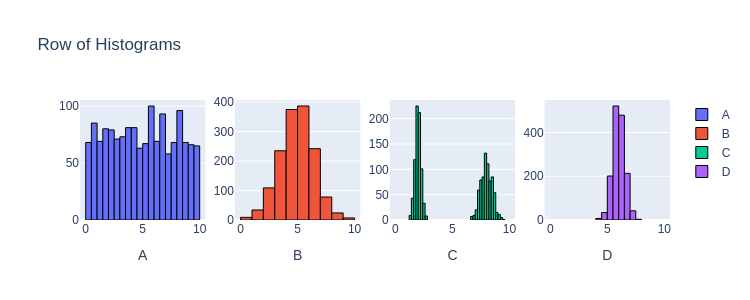

In [88]:
#QUESTION 4
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [89]:
#Which datasets have similar means and similar variances
#BD
#Which datasets have similar means but quite different variances
#BC
#Which datasets have similar variances but quite different means
#CD
#Which datasets have quite different means and quite different variances
#AC

In [90]:
#QUESTION 5
#Right-Skewed Distribution (Positively Skewed): Higher values is longer, and pulling the distribution to the right.
#Mean > Median
#the long tail of larger values increases the average (mean), while the median remains at the center of the data 
#Left-Skewed Distribution is completely opposite with right-skewed: Lower values is longer, and pulling the distribution to the left.
#Mean < Median
#the long tail of smaller values decreases the average (mean), while the median remains at the center of the data 

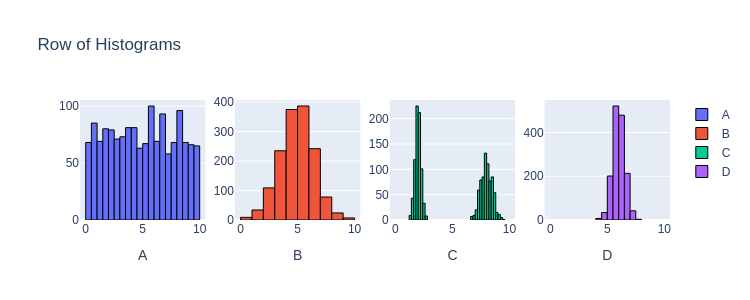

((1.9450118959304488, 1.373565234490036),
 (-2.0702274074532308, -1.462670364014753),
 (0.01292782466531083, 0.0008667171094107649))

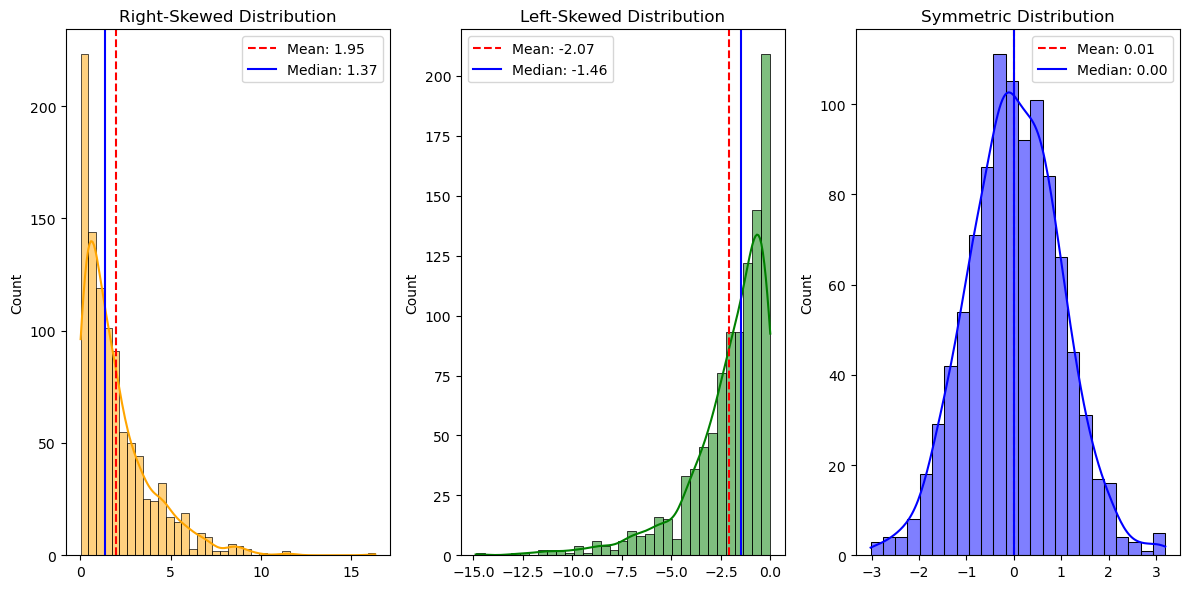

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Generate datasets
right_skewed = np.random.exponential(scale=2, size=1000)  # Right skewed distribution
left_skewed = -np.random.exponential(scale=2, size=1000)  # Left skewed distribution
symmetric = np.random.normal(loc=0, scale=1, size=1000)   # Symmetric normal distribution

# Calculate mean and median for each dataset
mean_right = np.mean(right_skewed)
median_right = np.median(right_skewed)

mean_left = np.mean(left_skewed)
median_left = np.median(left_skewed)

mean_symmetric = np.mean(symmetric)
median_symmetric = np.median(symmetric)

# Plot the distributions
plt.figure(figsize=(12, 6))

# Right skewed
plt.subplot(1, 3, 1)
sns.histplot(right_skewed, kde=True, color="orange")
plt.axvline(mean_right, color='r', linestyle='--', label=f'Mean: {mean_right:.2f}')
plt.axvline(median_right, color='b', linestyle='-', label=f'Median: {median_right:.2f}')
plt.title('Right-Skewed Distribution')
plt.legend()

# Left skewed
plt.subplot(1, 3, 2)
sns.histplot(left_skewed, kde=True, color="green")
plt.axvline(mean_left, color='r', linestyle='--', label=f'Mean: {mean_left:.2f}')
plt.axvline(median_left, color='b', linestyle='-', label=f'Median: {median_left:.2f}')
plt.title('Left-Skewed Distribution')
plt.legend()

# Symmetric
plt.subplot(1, 3, 3)
sns.histplot(symmetric, kde=True, color="blue")
plt.axvline(mean_symmetric, color='r', linestyle='--', label=f'Mean: {mean_symmetric:.2f}')
plt.axvline(median_symmetric, color='b', linestyle='-', label=f'Median: {median_symmetric:.2f}')
plt.title('Symmetric Distribution')
plt.legend()

plt.tight_layout()
fig.show(renderer="png")
(mean_right, median_right), (mean_left, median_left), (mean_symmetric, median_symmetric)


In [92]:
#chat gpt https://chatgpt.com/share/66f61f61-6818-800e-9e97-a317db6b4c27 (q5)

In [93]:
#QUESTION 6#
import pandas as pd

# Load the Wine Quality dataset with the correct separator
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, sep=';')

# Display the first few rows to check if it is loaded correctly
print(data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [94]:
#Summarize

summary_stats = data.describe()
print(summary_stats)



       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

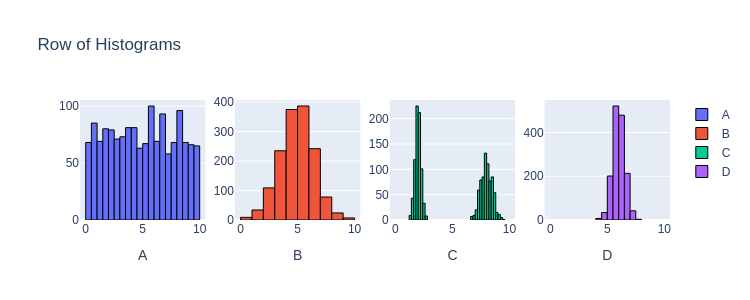

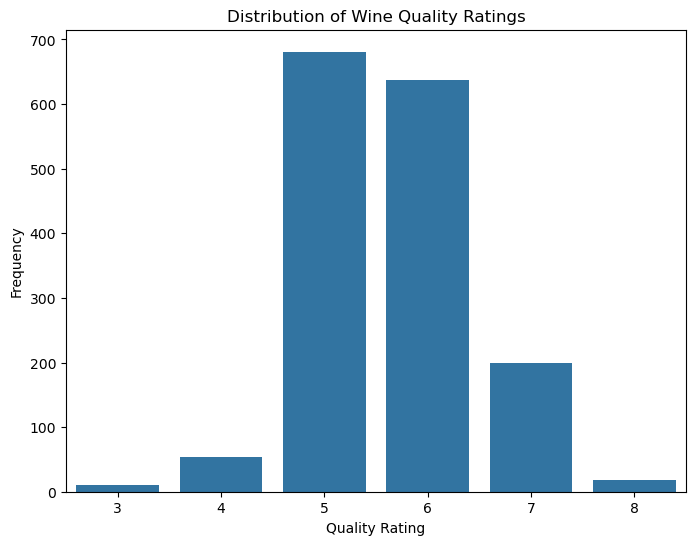

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of wine quality
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data)
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Rating')
plt.ylabel('Frequency')
fig.show(renderer="png")



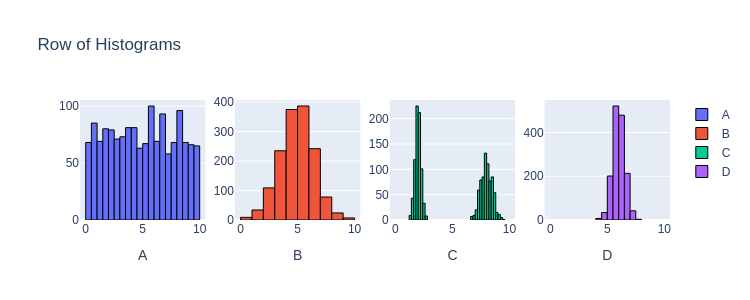

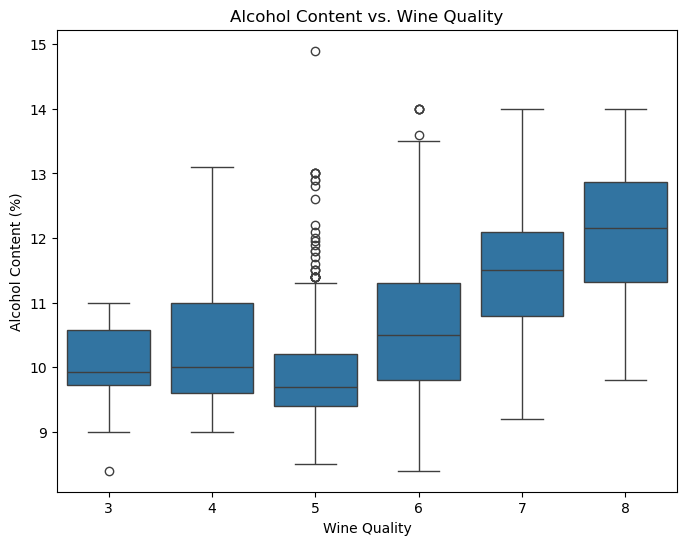

In [102]:
# Plot relationship between alcohol content and quality
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='alcohol', data=data)
plt.title('Alcohol Content vs. Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Content (%)')
fig.show(renderer="png")


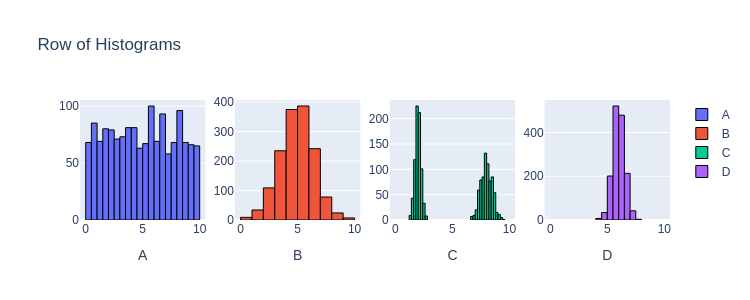

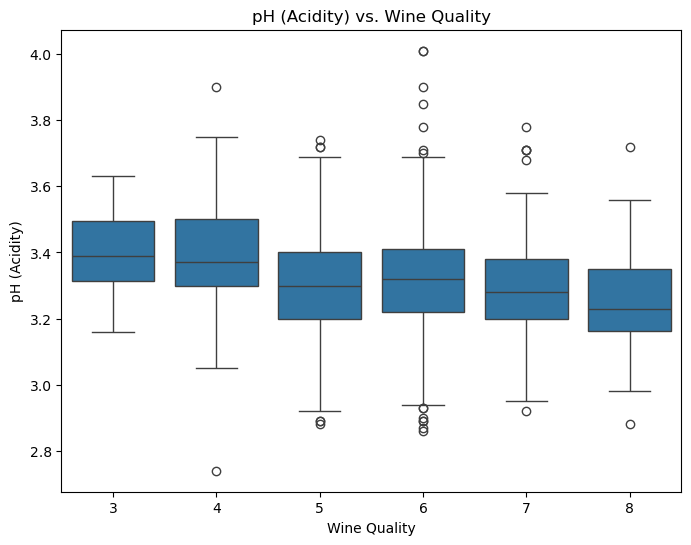

In [103]:
# Plot relationship between pH and wine quality
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='pH', data=data)
plt.title('pH (Acidity) vs. Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('pH (Acidity)')
fig.show(renderer="png")


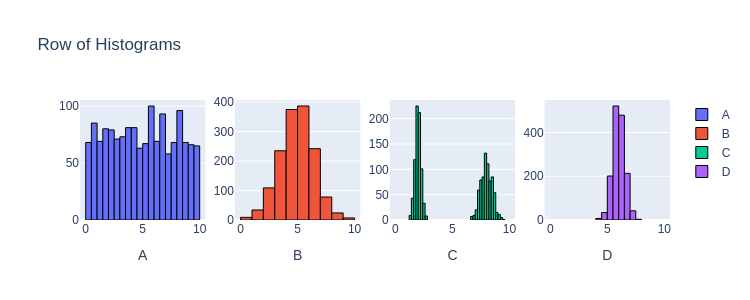

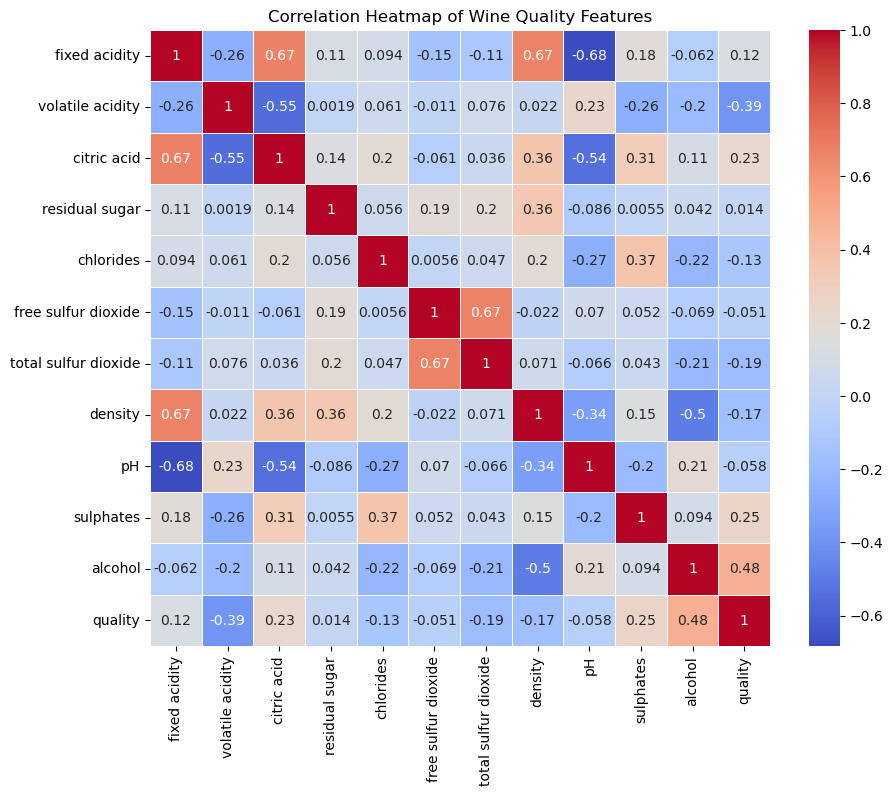

In [104]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()

# Heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Wine Quality Features')
fig.show(renderer="png")


In [99]:
#chat gpt https://chatgpt.com/share/66f61f98-c8d4-800e-93bd-31b0e1553ff3 (q6)